In [2]:
from DrissionPage import WebPage
import pandas as pd
import re
import json

In [3]:

def extract_salary(s):
    # 使用正则表达式匹配以“元/天”结尾的数字部分
    match = re.search(r'(\d+)-(\d+)元/天$', s)
    if match:
        # 如果找到匹配项，提取数字部分
        
        return int(match.group(1)),int(match.group(2))
    
    match = re.search(r'(\d+)-(\d+)K', s)
    if match:
        # 提取薪资范围的起始值和结束值
        start_salary = int(match.group(1)) * 1000
        end_salary = int(match.group(2)) * 1000
        # 计算每天的薪资范围，假设一个月30天
        start_salary_per_day = round(start_salary / 30)
        end_salary_per_day = round(end_salary / 30)
        # 返回每天的薪资范围
        return start_salary_per_day, end_salary_per_day
    
    match = re.search(r'(\d+)-(\d+)K·(\d+)薪', s)
    if match:
        # 提取薪资范围的起始值和结束值
        start_salary = int(match.group(1)) * 1000*int(match.group(3))
        end_salary = int(match.group(2)) * 1000*int(match.group(3))
        # 计算每天的薪资范围
        start_salary_per_day = round(start_salary / 365)
        end_salary_per_day = round(end_salary / 365)
        # 返回每天的薪资范围
        return start_salary_per_day, end_salary_per_day
    
    match = re.search(r'(\d+)-(\d+)元/月', s)
    if match:
        # 提取薪资范围的起始值和结束值
        start_salary = int(match.group(1))
        end_salary = int(match.group(2))
        # 计算每天的薪资范围，假设一个月30天
        start_salary_per_day = round(start_salary / 30)
        end_salary_per_day = round(end_salary / 30)
        # 返回每天的薪资范围
        return start_salary_per_day, end_salary_per_day
    
    match = re.search(r'(\d+)-(\d+)元/时', s)
    if match:
        # 提取薪资范围的起始值和结束值
        start_salary = int(match.group(1))
        end_salary = int(match.group(2))
        # 计算每天的薪资范围，假设996
        start_salary_per_day = round(start_salary * 12)
        end_salary_per_day = round(end_salary * 12)
        # 返回每天的薪资范围
        return start_salary_per_day, end_salary_per_day
    return None

In [4]:
def extract_experience(s):
    match = re.search(r'(\d+)-(\d+)年', s)
    if match:
        return float(match.group(1)),float(match.group(2))
    match = re.search(r'经验不限', s)
    if match:
        return (0,0)
    match = re.search(r'(\d+)个月', s)
    if match:
        return float(int(match.group(1))/12) ,float(int(match.group(1))/12)  
    match = re.search(r'(\d+)年以内', s)
    if match:
        return 0,float(match.group(1))
    return None

In [5]:


wp = WebPage()
wp.listen.start("zpgeek/search/joblist.json")
wp.get("https://www.zhipin.com/web/geek/job?query=python%E7%88%AC%E8%99%AB&city=101010100")    
packet = wp.listen.wait()

job_list = []  # 创建一个空列表来收集工作信息
#peiking

wp.ele('xpath://li[@ka="sel-city-101010100"]').click()
for i in range(9):
    wp.ele('xpath://i[@class="ui-icon-arrow-right"]').click()
    packet = wp.listen.wait()
    for job in packet.response.body['zpData']['jobList']:
        # 检查每个字段是否为空
        if not all([job.get('jobName'), job.get('salaryDesc'), job.get('areaDistrict'), job.get('jobDegree'), job.get('jobExperience'), job.get('cityName')]):
            continue  # 如果任何一个字段为空，则跳过当前的job
        
        # 提取薪资和经验，如果其中之一为None，则跳过当前的job
        salary = extract_salary(job['salaryDesc'])
        experience = extract_experience(job['jobExperience'])
        if salary is None or experience is None:
            continue
        
        job_info = {
            'cityName': job['cityName'],
            'jobName': job['jobName'],
            'salary': salary,
            'areaDistrict': job['areaDistrict'],
            'jobDegree': job['jobDegree'],
            'experience': experience
        }
        job_list.append(job_info)  # 将工作信息添加到列表中

#上海
wp.ele('xpath://li[@ka="sel-city-101020100"]').click()
for i in range(9):
    wp.ele('xpath://i[@class="ui-icon-arrow-right"]').click()
    packet = wp.listen.wait()
    for job in packet.response.body['zpData']['jobList']:
        # 检查每个字段是否为空
        if not all([job.get('jobName'), job.get('salaryDesc'), job.get('areaDistrict'), job.get('jobDegree'), job.get('jobExperience'), job.get('cityName')]):
            continue  # 如果任何一个字段为空，则跳过当前的job
        
        # 提取薪资和经验，如果其中之一为None，则跳过当前的job
        salary = extract_salary(job['salaryDesc'])
        experience = extract_experience(job['jobExperience'])
        if salary is None or experience is None:
            continue
        
        job_info = {
            'cityName': job['cityName'],
            'jobName': job['jobName'],
            'salary': salary,
            'areaDistrict': job['areaDistrict'],
            'jobDegree': job['jobDegree'],
            'experience': experience
        }
        job_list.append(job_info)  # 将工作信息添加到列表中

#深圳
wp.ele('xpath://li[@ka="sel-city-101280600"]').click()
for i in range(9):
    wp.ele('xpath://i[@class="ui-icon-arrow-right"]').click()
    packet = wp.listen.wait()
    for job in packet.response.body['zpData']['jobList']:
        # 检查每个字段是否为空
        if not all([job.get('jobName'), job.get('salaryDesc'), job.get('areaDistrict'), job.get('jobDegree'), job.get('jobExperience'), job.get('cityName')]):
            continue  # 如果任何一个字段为空，则跳过当前的job
        
        # 提取薪资和经验，如果其中之一为None，则跳过当前的job
        salary = extract_salary(job['salaryDesc'])
        experience = extract_experience(job['jobExperience'])
        if salary is None or experience is None:
            continue
        
        job_info = {
            'cityName': job['cityName'],
            'jobName': job['jobName'],
            'salary': salary,
            'areaDistrict': job['areaDistrict'],
            'jobDegree': job['jobDegree'],
            'experience': experience
        }
        job_list.append(job_info)  # 将工作信息添加到列表中

#杭州
wp.ele('xpath://li[@ka="sel-city-101210100"]').click()
for i in range(9):
    wp.ele('xpath://i[@class="ui-icon-arrow-right"]').click()
    packet = wp.listen.wait()
    for job in packet.response.body['zpData']['jobList']:
        # 检查每个字段是否为空
        if not all([job.get('jobName'), job.get('salaryDesc'), job.get('areaDistrict'), job.get('jobDegree'), job.get('jobExperience'), job.get('cityName')]):
            continue  # 如果任何一个字段为空，则跳过当前的job
        
        # 提取薪资和经验，如果其中之一为None，则跳过当前的job
        salary = extract_salary(job['salaryDesc'])
        experience = extract_experience(job['jobExperience'])
        if salary is None or experience is None:
            continue
        
        job_info = {
            'cityName': job['cityName'],
            'jobName': job['jobName'],
            'salary': salary,
            'areaDistrict': job['areaDistrict'],
            'jobDegree': job['jobDegree'],
            'experience': experience
        }
        job_list.append(job_info)  # 将工作信息添加到列表中
# 将收集到的工作信息保存为JSON文件
with open('job_list.json', 'w', encoding='utf-8') as f:
    json.dump(job_list, f, ensure_ascii=False, indent=4)

In [6]:
#将JSON文件转换为CSV文件
with open('job_list.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# 步骤 2: 转换为 DataFrame
df = pd.DataFrame(data)

# 步骤 3: 导出为 CSV 文件
df.to_csv('job_list.csv', index=False, encoding='utf-8')

0      1440
1       400
2       833
3       500
4       833
       ... 
882     433
883     267
884    1667
885     333
886     200
Name: min_salary, Length: 887, dtype: int64


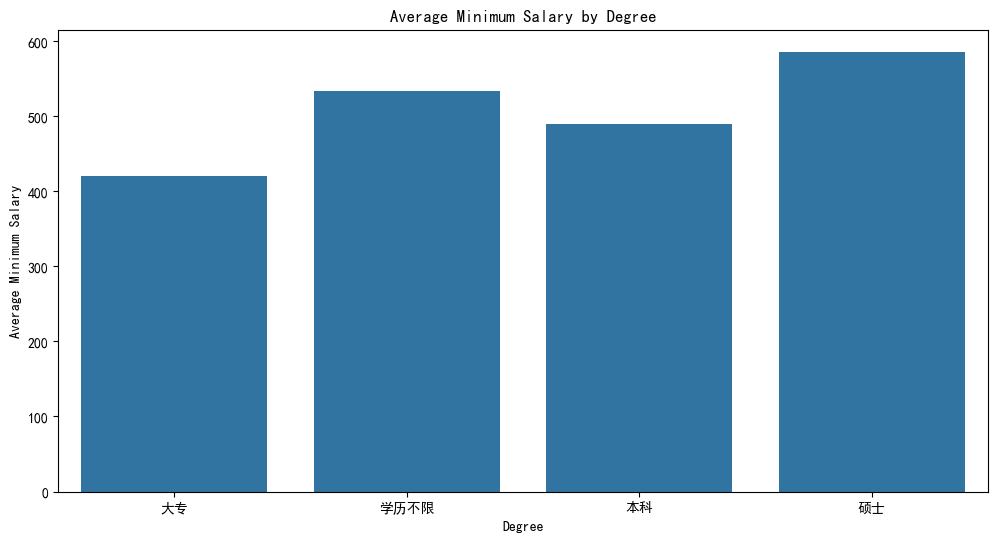

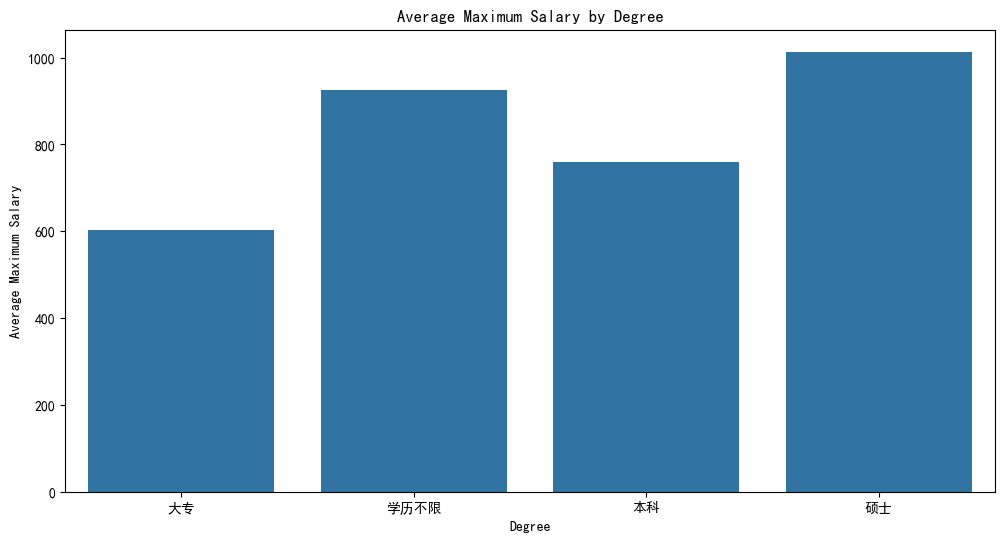

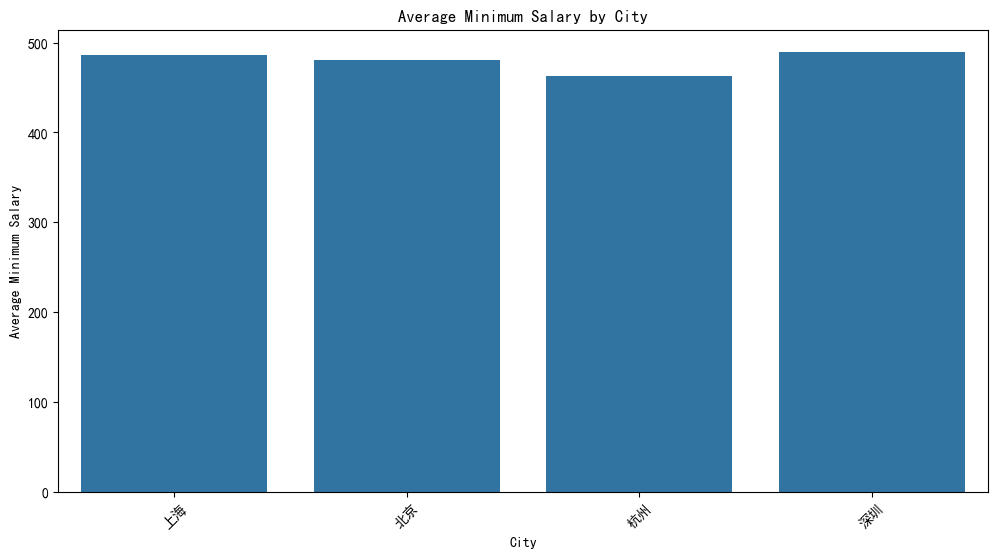

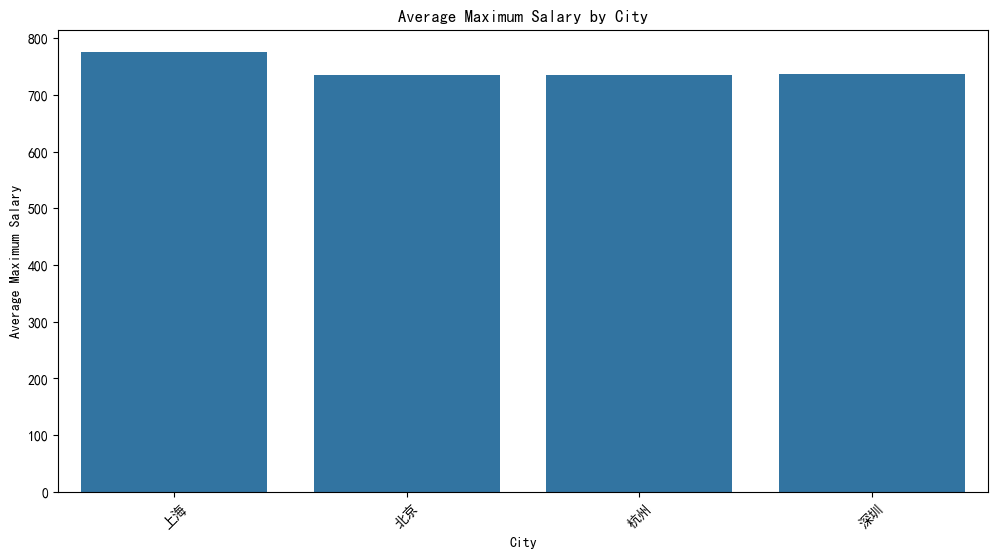

In [26]:
#开始数据分析

import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# 设置matplotlib的中文字体
rcParams['font.family'] = 'SimHei'  # 例如使用SimHei字体
rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 1. 数据准备
with open('job_list.json', 'r', encoding='utf-8') as f:
    job_list = json.load(f)
df = pd.DataFrame(job_list)

# 2. 数据清洗
# 提取薪资范围的最低值和最高值
df['min_salary'] = df['salary'].apply(lambda x: x[0] )
df['max_salary'] = df['salary'].apply(lambda x: x[1] )
print(df['min_salary'])
# 将min_salary和max_salary列转换为数值类型，非数字转换为NaN
df['min_salary'] = pd.to_numeric(df['min_salary'], errors='coerce')
df['max_salary'] = pd.to_numeric(df['max_salary'], errors='coerce')

# 3. 数据分析
# 先对每个学位的数据样本数量进行计数，然后只保留样本数量大于或等于10的数据
df_filtered = df.groupby('jobDegree').filter(lambda x: len(x) >= 10)

# 现在，使用过滤后的数据集进行分组和平均值计算
grouped_min = df_filtered.groupby('jobDegree')['min_salary'].mean().reset_index()
grouped_max = df_filtered.groupby('jobDegree')['max_salary'].mean().reset_index()

# 统计不同学历的样本数
degree_counts = df['jobDegree'].value_counts().reset_index()
degree_counts.columns = ['jobDegree', 'count']  # 重命名列以便理解
# 4. 数据可视化
# 最低薪资平均值
plt.figure(figsize=(12, 6))
sns.barplot(x='jobDegree', y='min_salary', data=grouped_min)
plt.title('Average Minimum Salary by Degree')
plt.xlabel('Degree')
plt.ylabel('Average Minimum Salary')
plt.savefig('avg_min_salary_by_degree.png', dpi=300)  # 保存图表
plt.show()

# 最高薪资平均值
plt.figure(figsize=(12, 6))
sns.barplot(x='jobDegree', y='max_salary', data=grouped_max)
plt.title('Average Maximum Salary by Degree')
plt.xlabel('Degree')
plt.ylabel('Average Maximum Salary')
plt.savefig('avg_max_salary_by_degree.png', dpi=300)  # 保存图表
plt.show()

# 根据地区分组并计算平均薪资
grouped_by_area_min = df.groupby('cityName')['min_salary'].mean().reset_index()
grouped_by_area_max = df.groupby('cityName')['max_salary'].mean().reset_index()

# 可视化不同地区的平均最低薪资
plt.figure(figsize=(12, 6))
sns.barplot(x='cityName', y='min_salary', data=grouped_by_area_min)  # Corrected 'areaDistrict' to 'cityName'
plt.xticks(rotation=45)  # 旋转x轴标签，以便更好地显示
plt.title('Average Minimum Salary by City')
plt.xlabel('City')
plt.ylabel('Average Minimum Salary')
plt.savefig('avg_min_salary_by_city.png', dpi=300)  # 保存图表
plt.show()

# 可视化不同地区的平均最高薪资
plt.figure(figsize=(12, 6))
sns.barplot(x='cityName', y='max_salary', data=grouped_by_area_max)  # Corrected 'areaDistrict' to 'cityName'
plt.xticks(rotation=45)  # 同样旋转x轴标签
plt.title('Average Maximum Salary by City')
plt.xlabel('City')
plt.ylabel('Average Maximum Salary')
plt.savefig('avg_max_salary_by_city.png', dpi=300)  # 保存图表
plt.show()

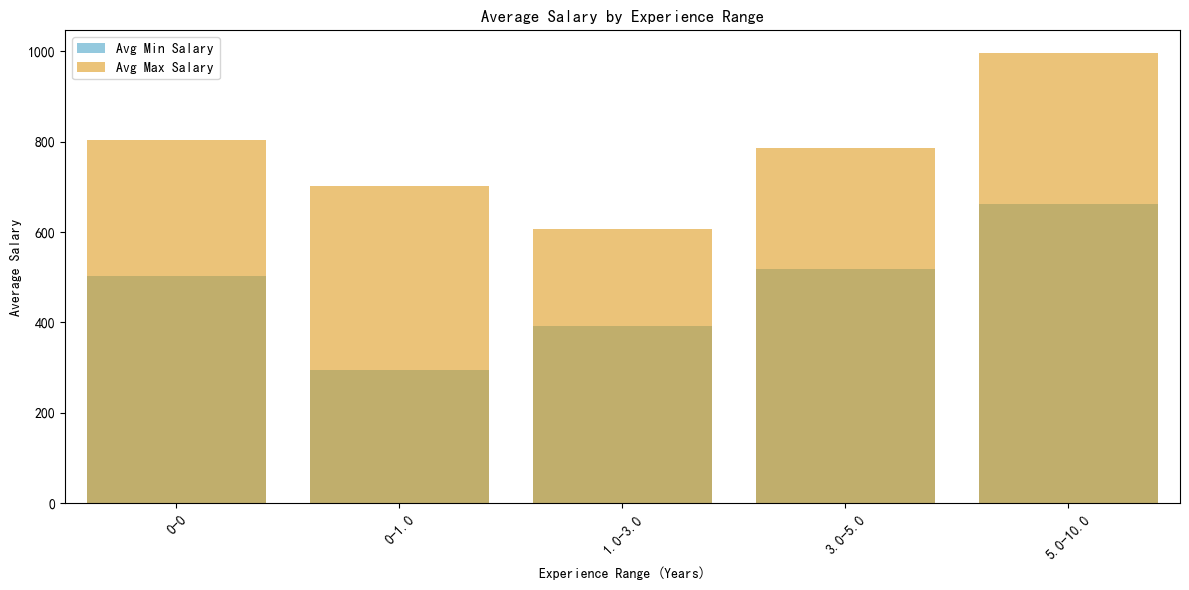

In [34]:

# 数据清洗：确保经验列是数值类型
df['min_experience'] = df['experience'].apply(lambda x: x[0] )
df['max_experience'] = df['experience'].apply(lambda x: x[1] )

df['min_experience'] = pd.to_numeric(df['min_experience'], errors='coerce')
df['max_experience'] = pd.to_numeric(df['max_experience'], errors='coerce')
df['mean_experience'] = (df['min_experience']+df['max_experience'])/2

# 创建经验区间列
df['experience_range'] = df['experience'].apply(lambda x: f"{x[0]}-{x[1]}")

# 分组计算平均薪资
grouped_by_experience_range = df.groupby('experience_range')[['min_salary', 'max_salary']].mean().reset_index()

# 数据可视化
plt.figure(figsize=(12, 6))
sns.barplot(x='experience_range', y='min_salary', data=grouped_by_experience_range, color='skyblue', label='Avg Min Salary')
sns.barplot(x='experience_range', y='max_salary', data=grouped_by_experience_range, color='orange', label='Avg Max Salary', alpha=0.6)
plt.title('Average Salary by Experience Range')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)  # 旋转x轴标签，以便更清晰地显示
plt.legend()
plt.tight_layout()
plt.savefig('avg_salary_by_experience_range.png', dpi=300)  # 保存图表
plt.show()

C:\Users\lin_zc\AppData\Local\Temp\ipykernel_261428\1739225943.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_distribution = df_selected.groupby(['cityName', 'salary_range']).size().unstack(fill_value=0)


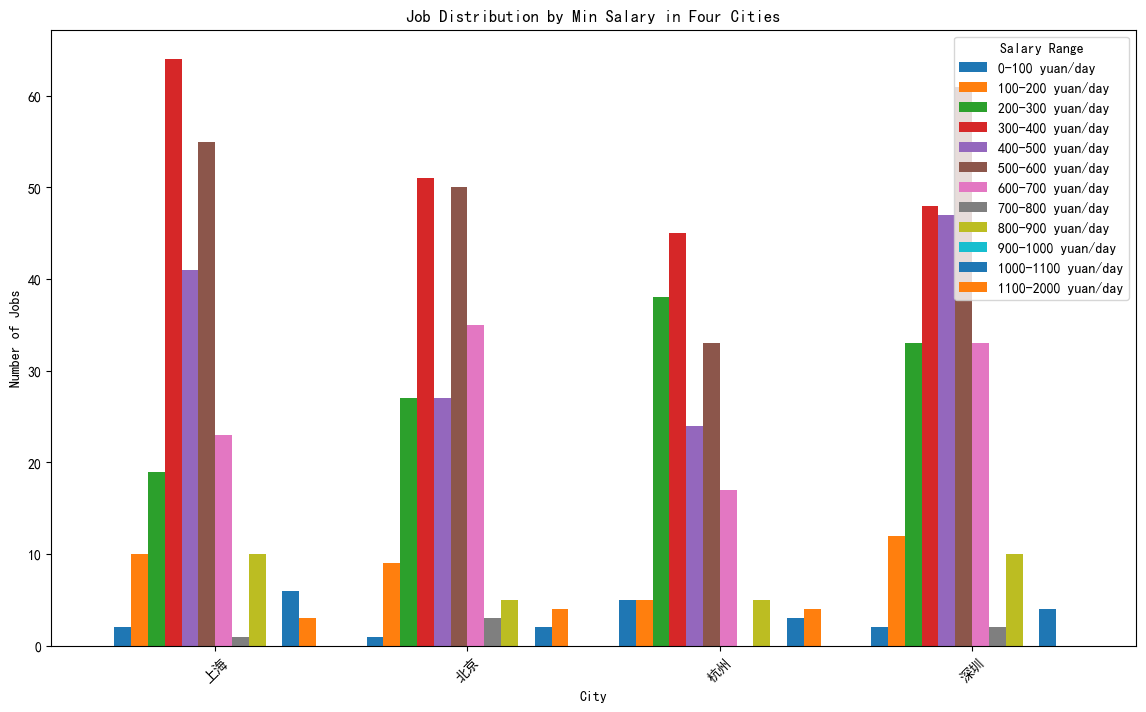

C:\Users\lin_zc\AppData\Local\Temp\ipykernel_261428\1739225943.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_distribution = df_selected.groupby(['cityName', 'salary_range']).size().unstack(fill_value=0)


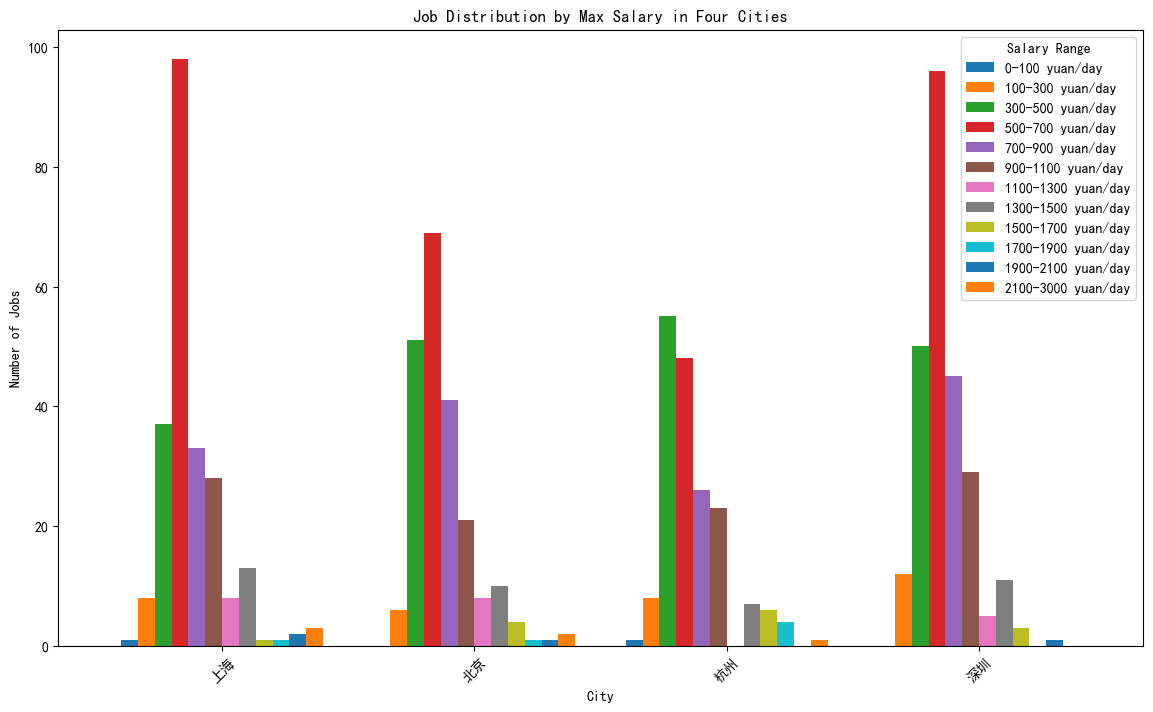

In [28]:
# 选择四个地区的数据
interested_cities = ['北京', '上海', '深圳', '杭州']
df_selected = df[df['cityName'].isin(interested_cities)]

# 定义薪资区间
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000,1100, 2000]
labels_min = ['0-100 yuan/day', '100-200 yuan/day', '200-300 yuan/day', '300-400 yuan/day', '400-500 yuan/day', '500-600 yuan/day', '600-700 yuan/day', '700-800 yuan/day', '800-900 yuan/day', '900-1000 yuan/day', '1000-1100 yuan/day', '1100-2000 yuan/day']

# 计算每个地区每个薪资区间的职位数
df_selected['salary_range'] = pd.cut(df_selected['min_salary'], bins=bins, labels=labels_min, right=False)
salary_distribution = df_selected.groupby(['cityName', 'salary_range']).size().unstack(fill_value=0)

# 数据可视化
salary_distribution.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Job Distribution by Min Salary in Four Cities')
plt.xlabel('City')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.legend(title='Salary Range')
plt.savefig('job_distribution_by_min_salary.png', dpi=300)  # 保存图表
plt.show()

bins = [0, 100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900,2100, 3000]
labels_max = ['0-100 yuan/day', '100-300 yuan/day', '300-500 yuan/day', '500-700 yuan/day', '700-900 yuan/day', '900-1100 yuan/day', '1100-1300 yuan/day', '1300-1500 yuan/day', '1500-1700 yuan/day', '1700-1900 yuan/day', '1900-2100 yuan/day', '2100-3000 yuan/day']
df_selected['salary_range'] = pd.cut(df_selected['max_salary'], bins=bins, labels=labels_max, right=False)
salary_distribution = df_selected.groupby(['cityName', 'salary_range']).size().unstack(fill_value=0)

# 数据可视化
salary_distribution.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Job Distribution by Max Salary in Four Cities')
plt.xlabel('City')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.legend(title='Salary Range')
plt.savefig('job_distribution_by_max_salary.png', dpi=300)  # 保存图表
plt.show()

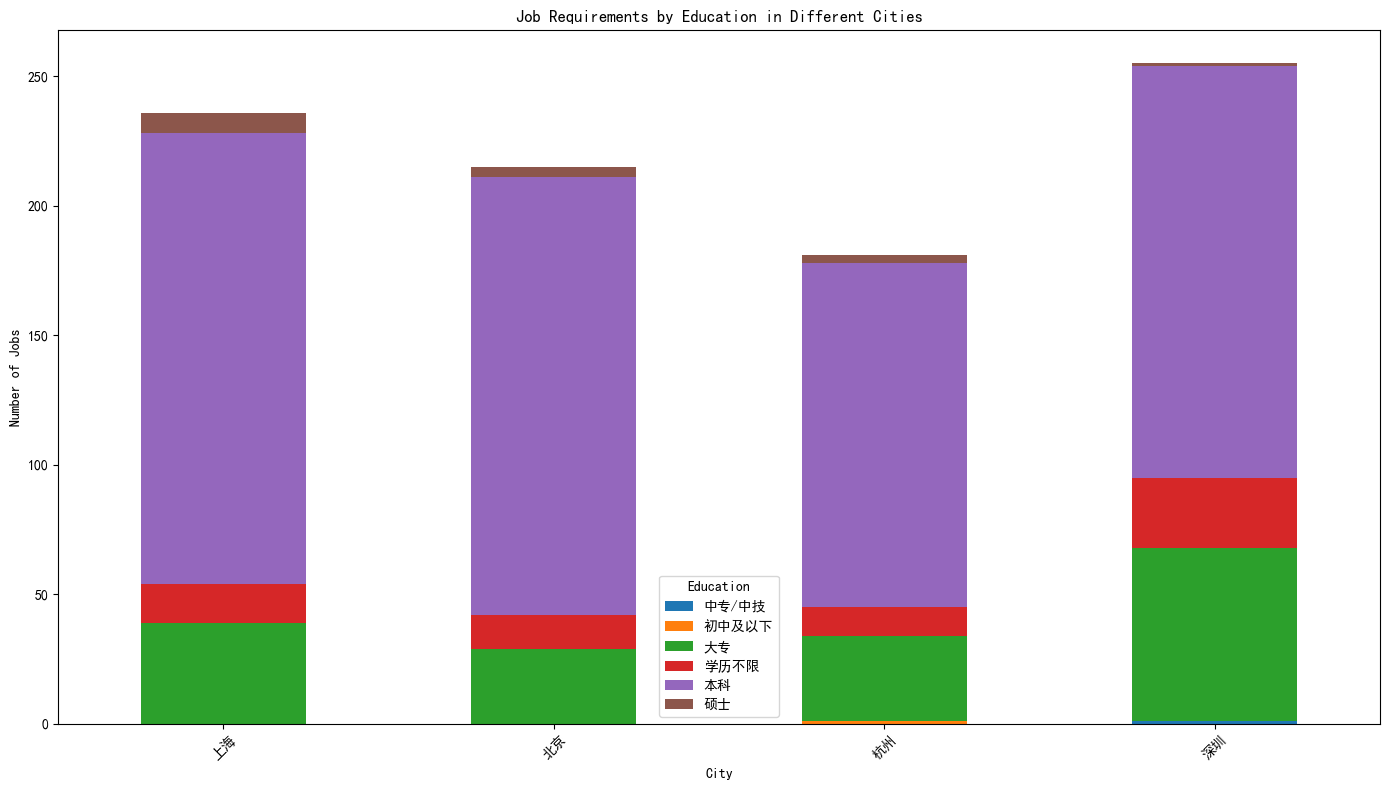

In [29]:

# 计算每个城市对每种学历要求的职位数量
education_distribution = df.groupby(['cityName', 'jobDegree']).size().unstack(fill_value=0)

# 步骤 3: 数据可视化
# 使用堆叠条形图展示不同城市对不同学历要求的职位数量
education_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Job Requirements by Education in Different Cities')
plt.xlabel('City')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.legend(title='Education')
plt.tight_layout()
plt.savefig('job_requirements_by_education.png', dpi=300)  # 保存图表
plt.show()

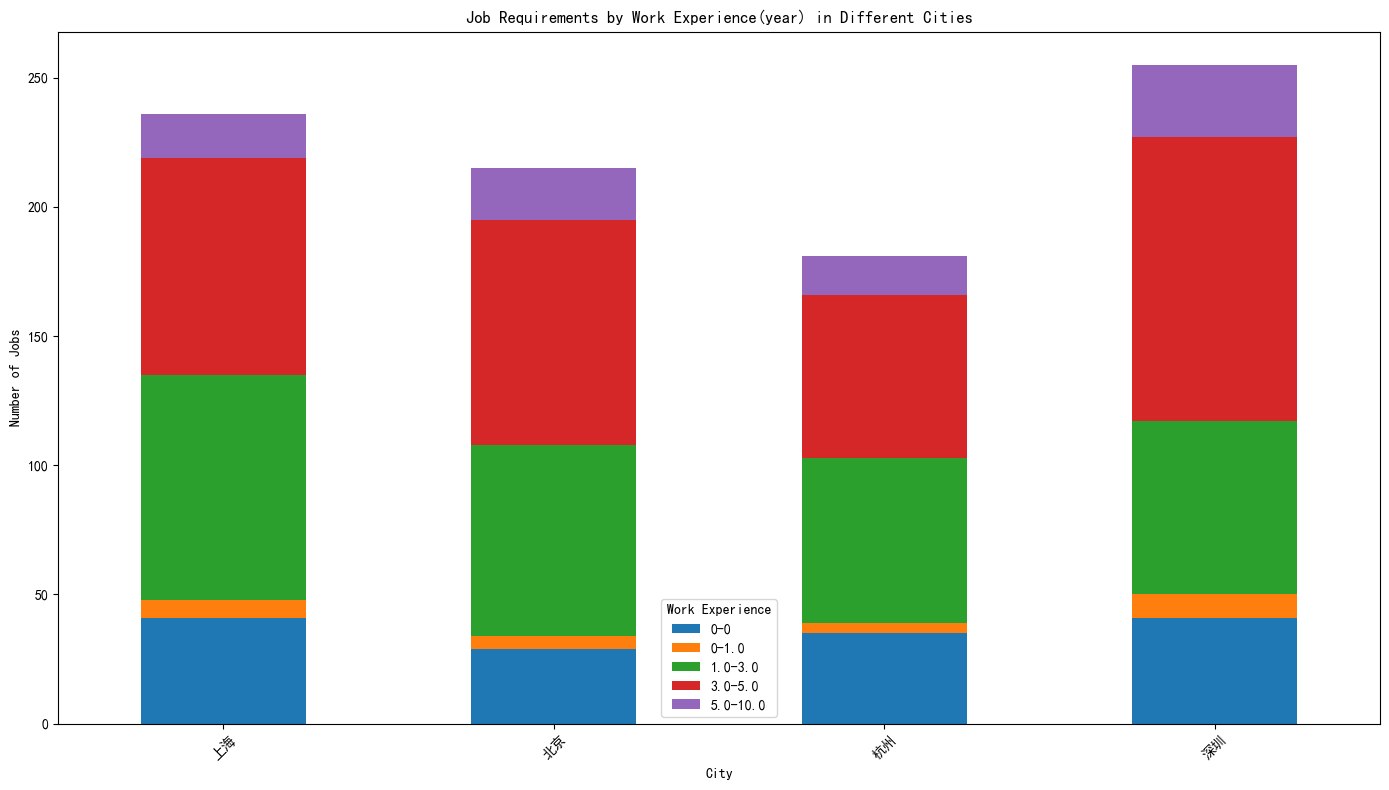

In [37]:
# 计算每个城市对每种工作经验要求的职位数量
experience_distribution = df.groupby(['cityName', 'experience_range']).size().unstack(fill_value=0)

# 使用堆叠条形图展示不同城市对不同工作经验要求的职位数量
experience_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Job Requirements by Work Experience(year) in Different Cities')
plt.xlabel('City')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.legend(title='Work Experience')
plt.tight_layout()
plt.savefig('job_requirements_by_min_experience.png', dpi=300)  # 保存图表
plt.show()


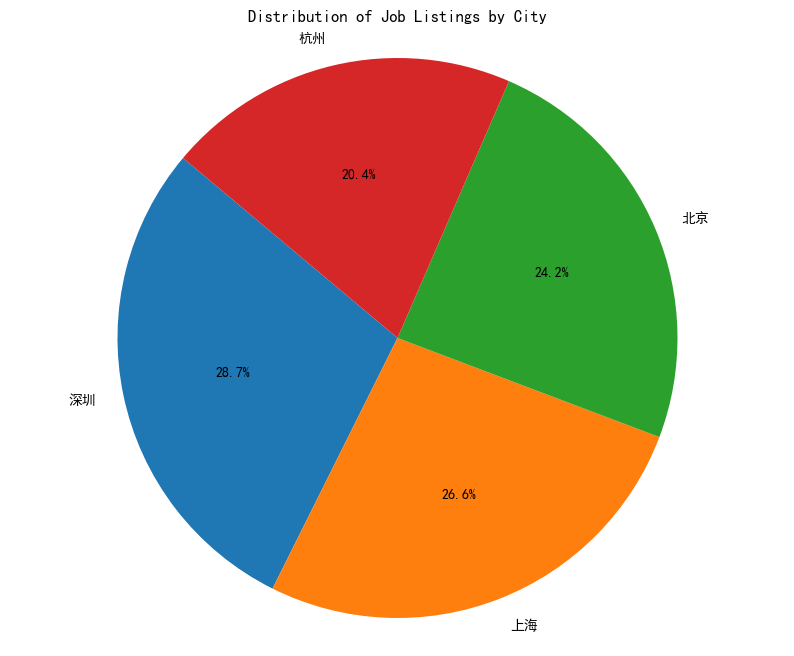

In [31]:
# Count the number of job listings per city
city_counts = df['cityName'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Job Listings by City')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('job_listings_by_city.png', dpi=300)  # Save the chart
plt.show()

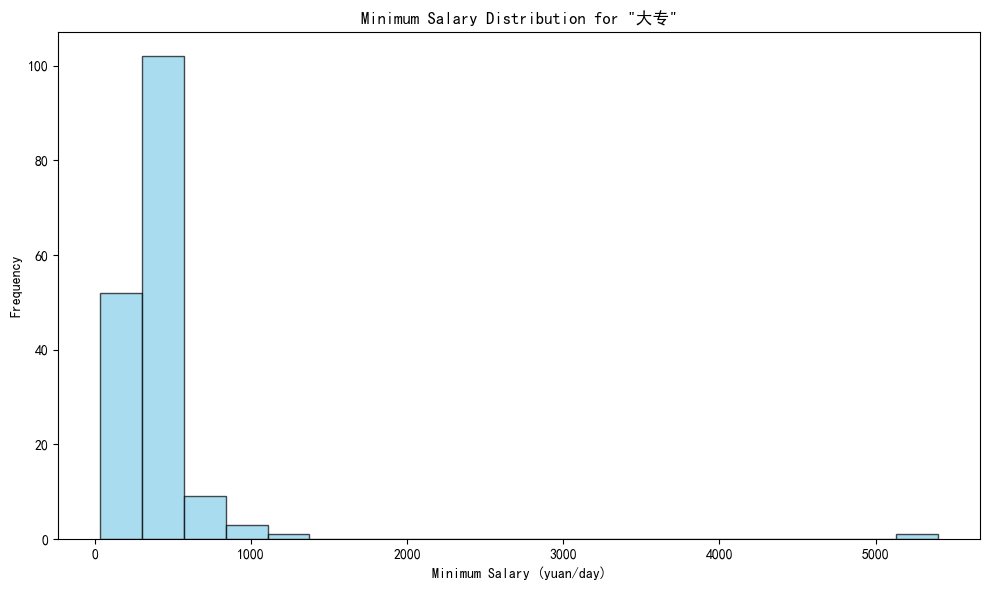

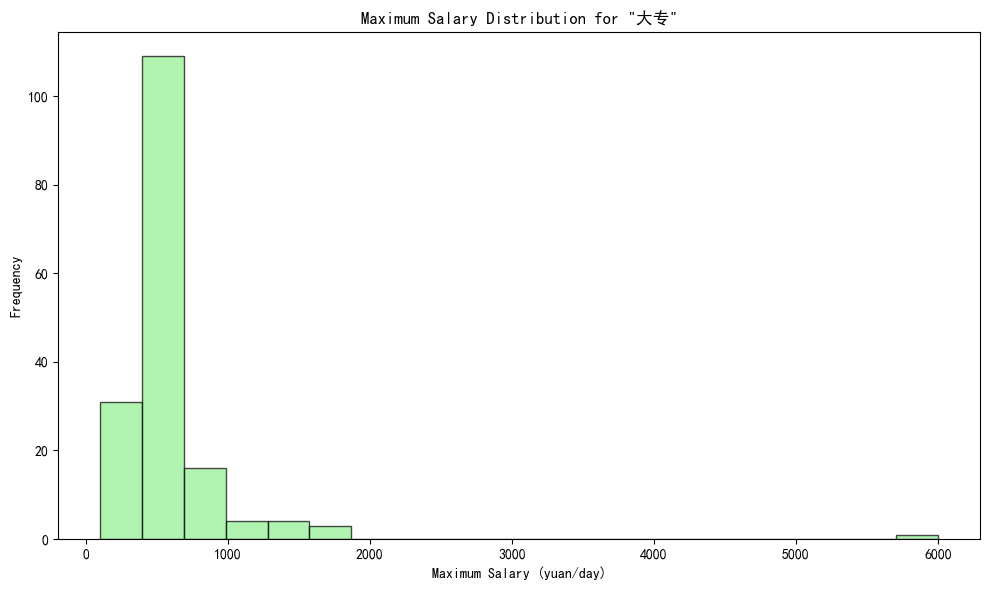

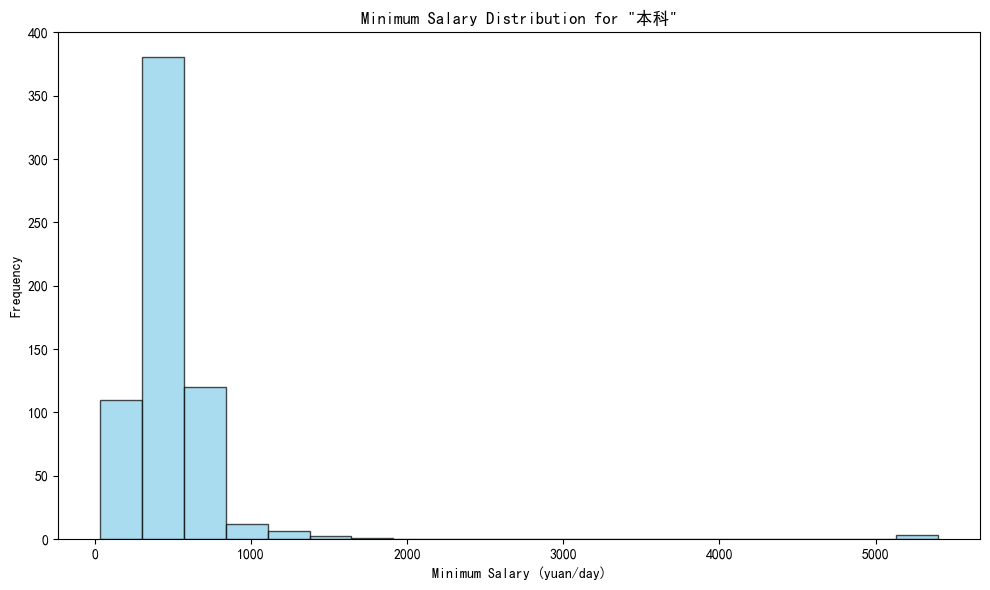

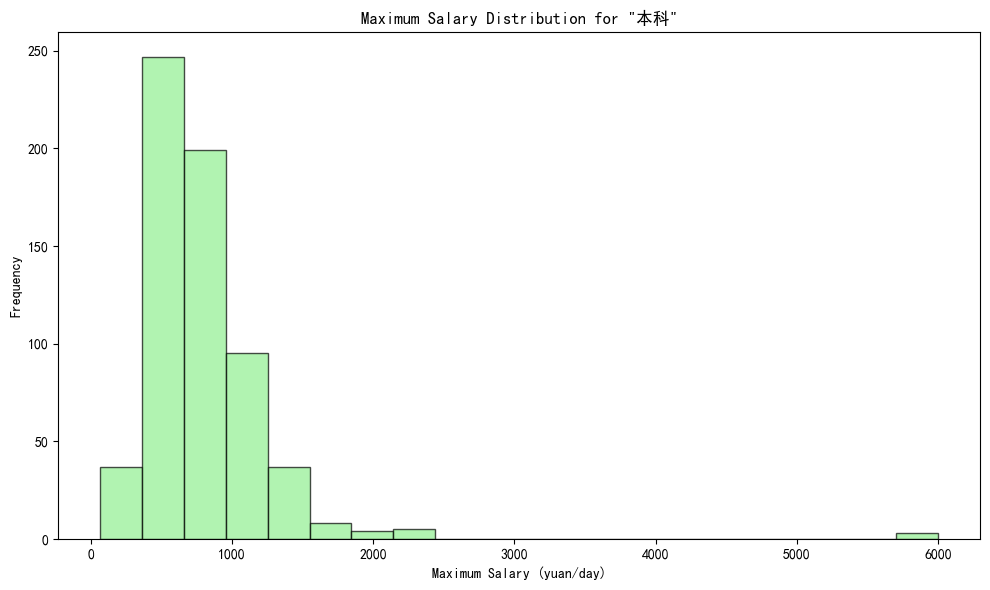

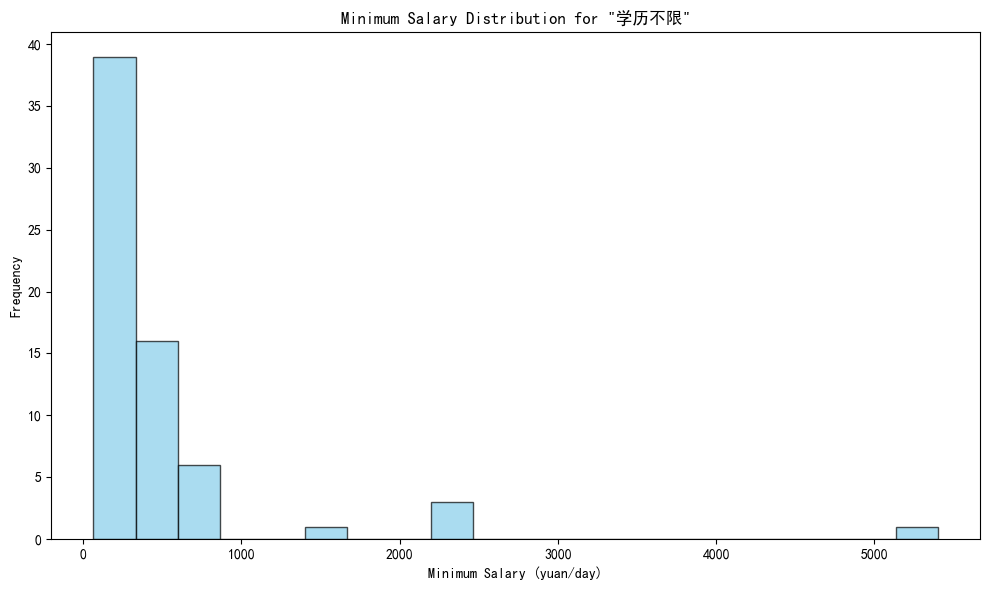

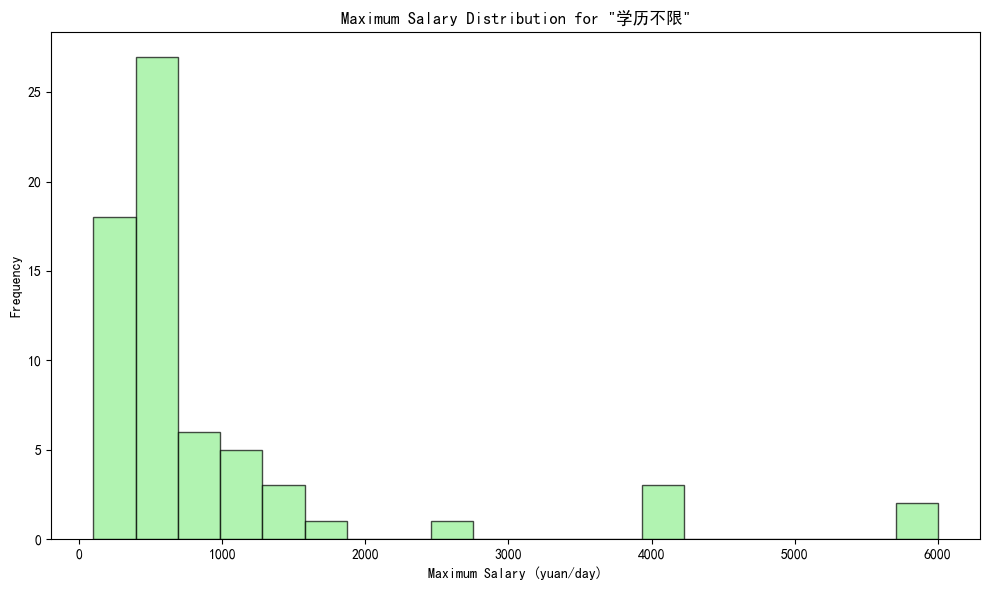

In [32]:
education_levels = ['大专', '本科', '学历不限']

for level in education_levels:
    # 筛选特定学历的数据
    df_specific_degree = df[df['jobDegree'] == level]
    
    # 绘制最低薪资的分布直方图
    plt.figure(figsize=(10, 6))
    plt.hist(df_specific_degree['min_salary'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Minimum Salary Distribution for "{level}"')
    plt.xlabel('Minimum Salary (yuan/day)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(f'min_salary_distribution_{level}.png', dpi=300)
    plt.show()
    
    # 绘制最高薪资的分布直方图
    plt.figure(figsize=(10, 6))
    plt.hist(df_specific_degree['max_salary'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
    plt.title(f'Maximum Salary Distribution for "{level}"')
    plt.xlabel('Maximum Salary (yuan/day)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(f'max_salary_distribution_{level}.png', dpi=300)
    plt.show()